# Biosphere Class - Everybody Poops

## Recommended reading:
 - Heaton, K. W., Radvan, J., Cripps, H., Mountford, R. A., Braddon, F. E., & Hughes, A. O. (1992). 
 Defecation frequency and timing, and stool form in the general population: a prospective study. 
 Gut, 33(6), 818-824.


In [ ]:
# One of the most essential parts of the scientific method comes after all of the data collection.
# After spending so much time and energy acquiring resources, performing experiments, and collecting data
# you'll want all of your work to be useful.  The only way it will be useful is if it allows you, the scientist,
# to discovery something novel and the general scientific community something that can be used to improve our 
# current understanding. This is the transformation of data to knowledge and wisdom. In order to gain this wisdom, 
# you must display your data in a way that is understandable and demonstrates clearly the revelation your study provides

In [ ]:
# In this example, we take data recreated from a 1992 study by Heaton et. al, from Bristol, England. It is the 
# first large-scale collection of human dececation behavior.  It surveys ~1000 men and women about the timing and 
# frequency of their poops.  Rather than asking people how often they poop (and if they have normal poops), they 
# asked them to record their data. 
# 
# In this exercise, you will use a recreated set of data from that studey and plot them to derive scientific insight.
# The two variables you will plot will be the time of day for a poop and the frequency interval between poops. 
# After these plots are generated, you will then derive scientific insights about human behavior.  These insights
# may be interesting to both you and the broader scientific community. For some, perhaps this will generate wisdom 
# that can lead to an improved human condition.
#
# Let's get sharted.

In [1]:
# This first cell imports different libraries into your notebook. These libraries act like a cookbook. You can call
# a recipe (aka function or method) from the cookbook to have the computer do something for you, but without access 
# to the cookbook, your computer will be just as confused as you are. 
# The first command, import pandas as pd, imports a library called pandas, and tells your computer you'd like to refer
# to it as the shorter "pd". This just saves time and typing later.
import pandas as pd
import numpy as np
from numpy.random import randn
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Using the pandas library you loaded in above, you can call a command for your computer to "read" the csv file
#containing the recreated data from the study. Here, we've named it "defecation_data", which is how we will
#refer to it in future commands. You, however, could name it whatever you'd like, such as turd_count or poop. 
#Names should be informative and relatively short. Use a "_" any time you would typically put a space.
defecation_data = pd.read_csv('defecation_data.csv')

In [4]:
#See how many rows this dataset contains. (length) This can help inform you what will be necessary when visualizing
#this data. Massive data sets and short data sets should be dealth with in different ways.
len(defecation_data)

1898

In [6]:
#Get a preview of what this datset looks like. If you want to see what data you're working with but do not want
#to scroll through all 1898 lines, you can use the head command. This will show you the first 5 data points of
#the dataset you've loaded in. Notice the column names. These are variables you will be able to work with.
#age_range, as expected, is the age range within the participant falls
#avg_hr represents the average hour of the day this participant would poop
#avg_int represents the average interval (in hours) that the participant would go between poops
#
# When this plots, you will see the following column headers for the data:

# participant_id:  anonymous identification number for an individual
# sex: biological sex of the individual
# age_range:  age range of the individual
# hr:  time of defecation event rounded to nearest hour

defecation_data.head()

,sex,age_range,avg_hr,avg_int
0,Female,30-39,6,24
1,Female,50-59,10,6
2,Female,25-29,19,25
3,Male,60-69,8,14
4,Male,40-49,15,13


In [7]:
#View a summary of statistics for the dataset
defecation_data.describe()

,avg_hr,avg_int
count,1898.000000,1898.000000
mean,10.807165,24.814542
std,5.006344,11.608095
min,0.000000,1.000000
25%,7.000000,20.000000
50%,9.000000,24.000000
75%,13.000000,26.000000
max,23.000000,59.000000


In [8]:
#Looking at the mean, median, quartiles and range can help inform you, at a glance, of what your data may be
#suggesting. For instance, the mean interval appears to be around 24 hours, suggesting a daily poop cycle.

<function matplotlib.pyplot.show(*args, **kw)>

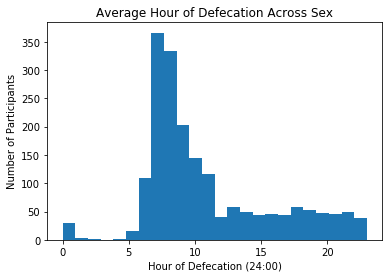

In [9]:
#Next, we can create a histogram to get a better visual of each of the variables.
#Let's start with avg_hr to see what time of day most people poop. Keep in mind 
plt.hist(defecation_data['avg_hr'],bins=24)
#The "bins=x" specifies how many bars in the barchart you'd like to see (24 for 24 hours in the day)
plt.title("Average Hour of Defecation Across Sex")
plt.xlabel('Hour of Defecation (24:00)')
plt.ylabel('Number of Participants')
plt.show
#plt.show is the only command that will actually generate an output. Everything before just informs
#details about the plot.

In [10]:
#Is this consistent with the hour of day you normally poop? What could be inferred
#from this data?

<function matplotlib.pyplot.show(*args, **kw)>

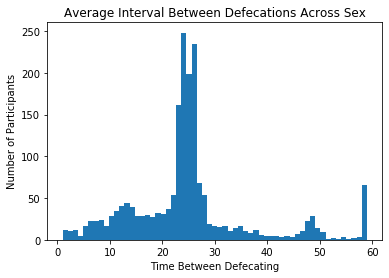

In [11]:
#Now, with average interval. The largest interval measured was 59 hours.
plt.hist(defecation_data['avg_int'],bins=59)
plt.title("Average Interval Between Defecations Across Sex")
plt.xlabel('Time Between Defecating')
plt.ylabel('Number of Participants')
plt.show

In [12]:
#Now, there are even more nuggets of wisdom to be gained from this data set. For instance, we can
#examine the difference in pooping schedules between Males and Females, the only sexes recognized 
#in Bristol in 1992. We've come a long way.
#To examine these differences, lets pinch this dataset into 2 separate vessels
#Let's make sure the variable "sex" is represented as we expect
print(defecation_data.sex.value_counts())

Female    1059
Male       839
Name: sex, dtype: int64


In [13]:
#Now that we know the only two options for sex are 'Female' and 'Male' (get it together, Heaton)
#we can create two separate datasets. Again, feel free to get creative with naming these.
female_defecation = defecation_data[defecation_data['sex'] == 'Female']
male_defecation = defecation_data[defecation_data['sex'] == 'Male']

In [15]:
#Again, check the previews of the dataframes, groundhogging, if you will
female_defecation.head()

,sex,age_range,avg_hr,avg_int
0,Female,30-39,6,24
1,Female,50-59,10,6
2,Female,25-29,19,25
5,Female,30-39,7,22
6,Female,50-59,11,48


In [16]:
male_defecation.head()

,sex,age_range,avg_hr,avg_int
3,Male,60-69,8,14
4,Male,40-49,15,13
10,Male,40-49,6,6
13,Male,50-59,7,20
14,Male,60-69,14,25


(array([ 13.,   3.,   1.,   0.,   1.,  13.,  75., 184., 114.,  70.,  62.,
         43.,  17.,  33.,  24.,  21.,  23.,  21.,  26.,  25.,  23.,  16.,
         18.,  13.]),
 array([ 0.        ,  0.95833333,  1.91666667,  2.875     ,  3.83333333,
         4.79166667,  5.75      ,  6.70833333,  7.66666667,  8.625     ,
         9.58333333, 10.54166667, 11.5       , 12.45833333, 13.41666667,
        14.375     , 15.33333333, 16.29166667, 17.25      , 18.20833333,
        19.16666667, 20.125     , 21.08333333, 22.04166667, 23.        ]),
 <a list of 24 Patch objects>)

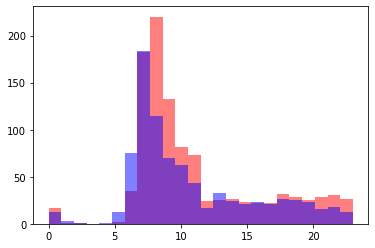

In [23]:
#Now let's compare these. We can graph the two histograms on the same chart to better visualize differences.
#The color variable can be defined with most colors and the alpha variable dictates the translucency
#Change the color to whatever you'd like (brown?) and alter the transparencies
plt.hist(female_defecation['avg_hr'],color='red',alpha=0.5,bins=24)
plt.hist(male_defecation['avg_hr'],color='blue',alpha=0.5,bins=24)

(array([  7.,   4.,   8.,   5.,   9.,  10.,   9.,   8.,  11.,  14.,  18.,
         26.,  28.,  22.,  14.,  13.,  16.,  13.,  17.,  18.,  17.,  31.,
        137., 193.,  38.,  20.,  14.,  13.,   8.,   6.,   6.,   5.,   5.,
          4.,   6.,   4.,   3.,   1.,   2.,   2.,   1.,   1.,   1.,   1.,
          2.,   3.,   3.,   5.,   8.,   3.,   3.,   0.,   1.,   0.,   2.,
          1.,   1.,   2.,  16.]),
 array([ 1.        ,  1.98305085,  2.96610169,  3.94915254,  4.93220339,
         5.91525424,  6.89830508,  7.88135593,  8.86440678,  9.84745763,
        10.83050847, 11.81355932, 12.79661017, 13.77966102, 14.76271186,
        15.74576271, 16.72881356, 17.71186441, 18.69491525, 19.6779661 ,
        20.66101695, 21.6440678 , 22.62711864, 23.61016949, 24.59322034,
        25.57627119, 26.55932203, 27.54237288, 28.52542373, 29.50847458,
        30.49152542, 31.47457627, 32.45762712, 33.44067797, 34.42372881,
        35.40677966, 36.38983051, 37.37288136, 38.3559322 , 39.33898305,
        40.3

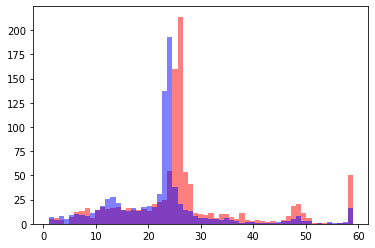

In [24]:
#Now, do the same with average interval between poops
plt.hist(female_defecation['avg_int'],color='red',alpha=0.5,bins=59)
plt.hist(male_defecation['avg_int'],color='blue',alpha=0.5,bins=59)

In [ ]:
#What can you glean from these two graphs? 
#What is the most shocking aspect of these graphs?
#What else can you look at? Age range? 
#See if you can squeeze a couple of these out.